### **COMPORTEMENT DYNAMIQUE D'UN RÉSEAU RECURRENT**

#### **Données**

In [101]:
from numpy import array,random,triu,arange
import matplotlib.pyplot as plt

In [113]:
matrice_poids = array([[0, -1, 1, 1],
                 [-1, 0, 1, -1],
                 [1, 1, 0, 1],
                 [1, -1, 1, 0]])
states = [[0,0,0,0], [0,0,0,1], [0,0,1,0], [0,0,1,1],
           [0,1,0,0], [0,1,0,1], [0,1,1,0], [0,1,1,1],
           [1,0,0,0], [1,0,0,1], [1,0,1,0], [1,0,1,1],
           [1,1,0,0], [1,1,0,1], [1,1,1,0], [1,1,1,1]]

f_activation = lambda x: 1 if x > 0 else 0

# on part de la config "0" :

initial_state = [0, 0, 0, 0]

# testons la cellule "a" aka "cellule 0" :

cellule=0


In [50]:
# fonction qui passe d'un entier au vecteur contenant la sequence de bits correspondante
def int_vers_binvec (x,nb_bits) :
  tmp = f'{bin(x):>{nb_bits+2}}'.replace("0b", "").replace(" ", "0")
  config = [0 for _ in range(nb_bits)]
  for cellule in range(nb_bits) :
   config[cellule]=int(tmp[cellule])
  return config

# fonction qui passe d'un vecteur contenant une sequence de bits a l'entier correspondant
def binvec_vers_int (config): 
  x = "0b"
  for i in range(len(config)):
    x += str(config[i])
  return int(x, 2)
  

#### **La classe reseau recurrent**

In [71]:
# La classe reseau recurrent 
class ReseauRecurrent:
    def __init__(self,matrice) -> None:
        self.matrice = matrice
        # la liste des etats stables 
        self.stable = []
        # La liste des cycles
        self.cycle = []
    
    # Une fonction qui retourne l'état résultant d'un influ synchrone en partant d'un état
    def influ_synchrone(self,state):
        # On initialise une liste [0,0,....] pour le nouvel état  
        new_state = [0]*len(state)
        #On calcule les nouvelles valeurs pour cet état
        for i in range (len(state)):
           s = 0
           for j in range(len(state)):
              s += self.matrice[j][i]*state[j]
           new_state[i]=f_activation(s)
        
        return new_state

    # Une fonction qui retourne l'état résultant d'un influ asynchrone en partant d'un état

    def influ_asynchrone(self,state):
        for i in range (len(state)):
          s = 0
          for j in range(len(state)):
              s+= self.matrice[j][i]*state[j]
          state[i] = f_activation(s)
        return state
    
    # Une fonction qui prend en paramètre l'état initial du réseau et affiche son évolution
    def evolution(self,state,synchrone = True):
        # une liste qui contiendra l'état précédent,actuel et suivant
        print(f"=============INITIAL STATE {state} =============\n")
        print(f"{state}",end=" => ")
        state = int_vers_binvec(state,self.matrice.shape[0])
        p_a_s =[[],[],state[:]]
        new_state = state[:]
        
        while True:
            # Si synchrone est True, alors les influs sont synchrones
            if(synchrone):
                new_state=self.influ_synchrone(new_state)
            # Sinon, asynchone
            else:
                new_state=self.influ_asynchrone(new_state)
            p_a_s.append(new_state)
            p_a_s.pop(0)
            # Etat stable , l'état actuelle et le suivant sont les mêmes 
            if(p_a_s[1]==p_a_s[2]):
                print(f"Etat stable {binvec_vers_int(p_a_s[1])} \n")
                # lorsqu'on découvre un nouvel état stable on l"ajoute à liste des états stables
                if(p_a_s[1] not in self.stable):
                    self.stable.append(p_a_s[1])
                break
            # Y a un cycle si l'état suivant notre état actuel est le même que son état précédent
            elif(p_a_s[0]==p_a_s[2]):
                print(f"Nous avons un cycle {binvec_vers_int(p_a_s[0])} => {binvec_vers_int(p_a_s[1])} => {binvec_vers_int(p_a_s[2])}\n")
                if ([p_a_s[0],p_a_s[1],p_a_s[2]] not in self.cycle):
                    self.cycle.append([p_a_s[0],p_a_s[1],p_a_s[2]])
                break
            else:
                print(binvec_vers_int(new_state), end=" => ")


    def getStableCount(self):
        return len(self.stable)

    def getCycleCount(self):
        return len(self.cycle)
    
    def resetCount(self):
        self.cycle=[]
        self.stable =[]

#### **Tests**

In [114]:
# Test sur quelques états 
reseau_recurent = ReseauRecurrent(matrice=matrice_poids)
print(reseau_recurent.influ_synchrone([1,1,0,1]))
print(reseau_recurent.influ_synchrone([0,0,1,0]))
print(reseau_recurent.influ_asynchrone([1,1,0,1]))

[0, 0, 1, 0]
[1, 1, 0, 1]
[0, 0, 1, 1]


#### **EVOLUTION DU RESEAU EN PARTANT D'UN ETAT INITIAL DONNÉ**

##### Evolution à partir d'un état initial

In [115]:
reseau_recurent.evolution(0)

=============INITIAL STATE 0 =============

0 => Etat stable 0 



##### Evolutions en partant de tous les etats initials possibles

In [116]:
for state in range(2**4):
    reseau_recurent.evolution(state,synchrone=True)

=============INITIAL STATE 0 =============

0 => Etat stable 0 

=============INITIAL STATE 1 =============

1 => 10 => 11 => Etat stable 11 

=============INITIAL STATE 2 =============

2 => 13 => Nous avons un cycle 2 => 13 => 2

=============INITIAL STATE 3 =============

3 => 11 => Etat stable 11 

=============INITIAL STATE 4 =============

4 => 2 => 13 => Nous avons un cycle 2 => 13 => 2

=============INITIAL STATE 5 =============

5 => 2 => 13 => Nous avons un cycle 2 => 13 => 2

=============INITIAL STATE 6 =============

6 => Etat stable 6 

=============INITIAL STATE 7 =============

7 => 10 => 11 => Etat stable 11 

=============INITIAL STATE 8 =============

8 => 3 => 11 => Etat stable 11 

=============INITIAL STATE 9 =============

9 => 11 => Etat stable 11 

=============INITIAL STATE 10 =============

10 => 11 => Etat stable 11 

=============INITIAL STATE 11 =============

11 => Etat stable 11 

=============INITIAL STATE 12 =============

12 => 2 => 13 => Nous avons u

In [117]:
print(reseau_recurent.getStableCount())
print(reseau_recurent.getCycleCount())

3
2


In [119]:
for state in range(2**4):
        reseau_recurent.evolution(state,synchrone=False)

=============INITIAL STATE 0 =============

0 => Etat stable 0 

=============INITIAL STATE 1 =============

1 => 11 => Etat stable 11 

=============INITIAL STATE 2 =============

2 => 11 => Etat stable 11 

=============INITIAL STATE 3 =============

3 => 11 => Etat stable 11 

=============INITIAL STATE 4 =============

4 => 0 => Etat stable 0 

=============INITIAL STATE 5 =============

5 => 3 => Etat stable 11 

=============INITIAL STATE 6 =============

6 => Etat stable 6 

=============INITIAL STATE 7 =============

7 => 11 => Etat stable 11 

=============INITIAL STATE 8 =============

8 => 0 => Etat stable 0 

=============INITIAL STATE 9 =============

9 => 11 => Etat stable 11 

=============INITIAL STATE 10 =============

10 => 11 => Etat stable 11 

=============INITIAL STATE 11 =============

11 => Etat stable 11 

=============INITIAL STATE 12 =============

12 => 0 => Etat stable 0 

=============INITIAL STATE 13 =============

13 => 3 => Etat stable 11 

============

#### **ANALYSE DES ÉTATS STABLES ET CYCLES SUR UN PLUS GRAND RÉSEAU**

In [85]:
    
def simulateAllConfig(synchrone=True):
    # La matrice de poids (10*10) symétrique et aléatoire 
    # On crée une matrice 10*10 rempli de 1 et -1 aléatoirement 
    matrice10 = random.choice([-1,1],size=(10,10))
    # On garde son triangle supérieur
    matrice10 = triu(matrice10,1)
    # On lui ajoute sa transposée 
    matrice10 += matrice10.T
    matrice10
    # Notre réseau récurrent de 10 cellules 
    reseau_reccurent10 = ReseauRecurrent(matrice=matrice10)
    for i in range (2**10):
        # on fait evloluer le RNN à partir de tous les états initials possibles
        reseau_reccurent10.evolution(i,synchrone)
    #On retourne le nombre d'etat stables et de cycles
    return (reseau_reccurent10.getStableCount(),reseau_reccurent10.getCycleCount())

##### **EVOLUTION SYNCHRONE** 

In [90]:
nbEtatStable,nbCycles = simulateAllConfig(synchrone=True)

=============INITIAL STATE 0 =============

0 => Etat stable 0 

=============INITIAL STATE 1 =============

1 => 440 => 609 => Nous avons un cycle 440 => 609 => 440

=============INITIAL STATE 2 =============

2 => 44 => 851 => 40 => 595 => 168 => Nous avons un cycle 595 => 168 => 595

=============INITIAL STATE 3 =============

3 => 40 => 595 => 168 => Nous avons un cycle 595 => 168 => 595

=============INITIAL STATE 4 =============

4 => 266 => 549 => 424 => 609 => 440 => Nous avons un cycle 609 => 440 => 609

=============INITIAL STATE 5 =============

5 => 264 => 517 => 424 => 609 => 440 => Nous avons un cycle 609 => 440 => 609

=============INITIAL STATE 6 =============

6 => 14 => Etat stable 14 

=============INITIAL STATE 7 =============

7 => 296 => 599 => 40 => 595 => 168 => Nous avons un cycle 595 => 168 => 595

=============INITIAL STATE 8 =============

8 => 599 => 40 => 595 => 168 => Nous avons un cycle 595 => 168 => 595

=============INITIAL STATE 9 =============

9 => 

In [91]:
# le nombre de cycle et d'etats stables 
print(f"Le nombre d'etat stable est {nbEtatStable}")
print(f"Le nombre de cycle est {nbCycles}")

Le nombre d'etat stable est 16
Le nombre de cycle est 10


##### **EVOLUTION ASYNCHRONE** 

In [92]:
nbEtatStable,nbCycles = simulateAllConfig(False)

=============INITIAL STATE 0 =============

0 => Etat stable 0 

=============INITIAL STATE 1 =============

1 => 677 => Etat stable 677 

=============INITIAL STATE 2 =============

2 => 266 => Etat stable 394 

=============INITIAL STATE 3 =============

3 => 65 => Etat stable 65 

=============INITIAL STATE 4 =============

4 => 549 => Etat stable 677 

=============INITIAL STATE 5 =============

5 => 677 => Etat stable 677 

=============INITIAL STATE 6 =============

6 => 266 => Etat stable 394 

=============INITIAL STATE 7 =============

7 => 517 => Etat stable 677 

=============INITIAL STATE 8 =============

8 => 424 => Etat stable 424 

=============INITIAL STATE 9 =============

9 => 184 => Etat stable 184 

=============INITIAL STATE 10 =============

10 => 394 => Etat stable 394 

=============INITIAL STATE 11 =============

11 => 408 => Etat stable 408 

=============INITIAL STATE 12 =============

12 => 424 => Etat stable 424 

=============INITIAL STATE 13 =============

In [93]:
print(f"Le nombre d'etat stable est {nbEtatStable}")
print(f"Le nombre de cycle est {nbCycles}")

Le nombre d'etat stable est 14
Le nombre de cycle est 0


In [94]:
# On repete la simulation pour plusieurs matrices aléatoires différentes 
stable_count_list_synchrone =[] # Une liste pour sauvegarder le nombre d'état stables 
cycle_count_list_synchrone =[] # Pour les cycles 
for _ in range(10):
    nbEtatStable,nbCycles=simulateAllConfig(synchrone=True)
    stable_count_list_synchrone.append(nbEtatStable)
    cycle_count_list_synchrone.append(nbCycles)

=============INITIAL STATE 0 =============

0 => Etat stable 0 

=============INITIAL STATE 1 =============

1 => 308 => 19 => 316 => 659 => 300 => Nous avons un cycle 659 => 300 => 659

=============INITIAL STATE 2 =============

2 => 316 => 659 => 300 => Nous avons un cycle 659 => 300 => 659

=============INITIAL STATE 3 =============

3 => 308 => 19 => 316 => 659 => 300 => Nous avons un cycle 659 => 300 => 659

=============INITIAL STATE 4 =============

4 => 667 => 60 => 671 => Nous avons un cycle 60 => 671 => 60

=============INITIAL STATE 5 =============

5 => 21 => 287 => Etat stable 287 

=============INITIAL STATE 6 =============

6 => 30 => Etat stable 30 

=============INITIAL STATE 7 =============

7 => 316 => 659 => 300 => Nous avons un cycle 659 => 300 => 659

=============INITIAL STATE 8 =============

8 => 726 => 28 => 735 => Nous avons un cycle 28 => 735 => 28

=============INITIAL STATE 9 =============

9 => 20 => 31 => 286 => Nous avons un cycle 31 => 286 => 31

====

In [95]:
# On repete la simulation pour plusieurs matrices aléatoires différentes 
stable_count_list_asynchrone =[] # Une liste pour sauvegarder le nombre d'état stables 
cycle_count_list_asynchrone =[] # Pour les cycles 
for _ in range(10):
    nbEtatStable,nbCycles=simulateAllConfig(synchrone=False)
    stable_count_list_asynchrone.append(nbEtatStable)
    cycle_count_list_asynchrone.append(nbCycles)

=============INITIAL STATE 0 =============

0 => Etat stable 0 

=============INITIAL STATE 1 =============

1 => 659 => Etat stable 915 

=============INITIAL STATE 2 =============

2 => 659 => Etat stable 915 

=============INITIAL STATE 3 =============

3 => 915 => Etat stable 915 

=============INITIAL STATE 4 =============

4 => 271 => Etat stable 391 

=============INITIAL STATE 5 =============

5 => 391 => Etat stable 903 

=============INITIAL STATE 6 =============

6 => 391 => Etat stable 903 

=============INITIAL STATE 7 =============

7 => 903 => Etat stable 903 

=============INITIAL STATE 8 =============

8 => 271 => Etat stable 391 

=============INITIAL STATE 9 =============

9 => 391 => Etat stable 903 

=============INITIAL STATE 10 =============

10 => 391 => Etat stable 903 

=============INITIAL STATE 11 =============

11 => 903 => Etat stable 903 

=============INITIAL STATE 12 =============

12 => 271 => Etat stable 391 

=============INITIAL STATE 13 ===========

##### **GRAPHIQUES**

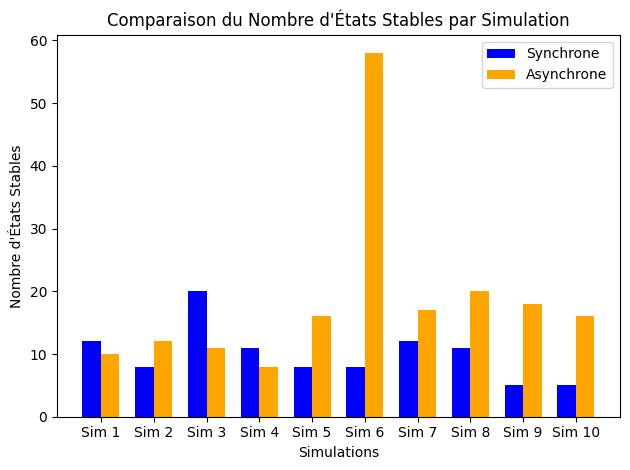

In [104]:

# Nombre de simulations
n_simulations = len(stable_count_list_synchrone)
labels = [f"Sim {i+1}" for i in range(n_simulations)]

# Positions pour les barres
x = arange(n_simulations)
width = 0.35  # Largeur des barres

# Création des barres pour chaque mode
plt.bar(x - width/2, stable_count_list_synchrone, width, label="Synchrone", color="blue")
plt.bar(x + width/2, stable_count_list_asynchrone, width, label="Asynchrone", color="orange")


plt.title("Comparaison du Nombre d'États Stables par Simulation")
plt.xlabel("Simulations")
plt.ylabel("Nombre d'États Stables")
plt.xticks(x, labels)  
plt.legend()


plt.tight_layout()
plt.show()


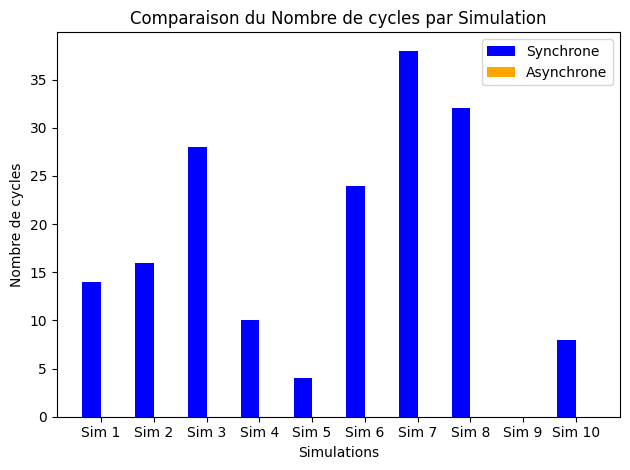

In [106]:
plt.bar(x - width/2, cycle_count_list_synchrone, width, label="Synchrone", color="blue")
plt.bar(x + width/2, cycle_count_list_asynchrone, width, label="Asynchrone", color="orange")


plt.title("Comparaison du Nombre de cycles par Simulation")
plt.xlabel("Simulations")
plt.ylabel("Nombre de cycles")
plt.xticks(x, labels) 
plt.legend()


plt.tight_layout()
plt.show()
